In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
root = "/kaggle/input/rf-eddy-required-data/"
files = [root+i for i in os.listdir(root)]
files

['/kaggle/input/rf-eddy-required-data/elninoPiod.csv',
 '/kaggle/input/rf-eddy-required-data/Upiod.csv',
 '/kaggle/input/rf-eddy-required-data/Ulanina.csv',
 '/kaggle/input/rf-eddy-required-data/laninaNiod.csv',
 '/kaggle/input/rf-eddy-required-data/neutral.csv',
 '/kaggle/input/rf-eddy-required-data/Uelnino.csv']

In [4]:
data = pd.read_csv(files[0])
data.columns

Index(['Unnamed: 0', 'lon', 'lat', 'ac_amplitude', 'ce_amplitude', 'ac_radius',
       'ce_radius', 'sst', 'sst_anomaly'],
      dtype='object')

In [5]:
targetL = ["ac_amplitude","ac_radius","ce_amplitude","ce_radius"]
tname = ["AC Amplitude", "AC Effective Radius", "CE Amplitude", "CE Effective Radius"]
clf = RandomForestRegressor(max_features = 5, random_state = 0, n_estimators = 100)
DataAttribute = ["El Niño and +IOD","Unique +IOD","Unique La Niña", "La Niña and -IOD",
                "Neutral","Unique El Niño"]


In [6]:
# +ENSO and +IOD year, target: AC Amplitude

drop = targetL.copy()
drop.append('Unnamed: 0')

def randomForest(j):
    
    data = pd.read_csv(files[j])
    
    rmse = []
    for targeti in range(len(targetL)):
        
        
        valName = targetL[targeti]
    
        #step 1: Split into train test
        y = data[valName]

        X = data.drop(drop,axis = 1)
        train, test, target_train,target_test  = train_test_split(X,y,test_size=0.25, random_state=42)

        # Step 2: Feed the data for training
        fit = clf.fit(train, target_train)

        # Step 3: Root mean squared error
        pred = clf.predict(test)
        mse = mean_squared_error(target_test, pred)
       
        rmse.append(np.sqrt(mse))
    
    return [[DataAttribute[j]+", Target: "+l for l in tname],rmse]

rf_rmse = [randomForest(j) for j in range(len(DataAttribute))]
rf_rmse 

[[['El Niño and +IOD, Target: AC Amplitude',
   'El Niño and +IOD, Target: AC Effective Radius',
   'El Niño and +IOD, Target: CE Amplitude',
   'El Niño and +IOD, Target: CE Effective Radius'],
  [1.6857293274042442,
   19.01024027937167,
   1.6355153282222952,
   18.60282478055376]],
 [['Unique +IOD, Target: AC Amplitude',
   'Unique +IOD, Target: AC Effective Radius',
   'Unique +IOD, Target: CE Amplitude',
   'Unique +IOD, Target: CE Effective Radius'],
  [2.9625878641164225,
   39.31202538956526,
   3.439359110071451,
   26.973402957352445]],
 [['Unique La Niña, Target: AC Amplitude',
   'Unique La Niña, Target: AC Effective Radius',
   'Unique La Niña, Target: CE Amplitude',
   'Unique La Niña, Target: CE Effective Radius'],
  [1.6777255129725728,
   23.288167547996004,
   1.7895612520707902,
   19.89859111977732]],
 [['La Niña and -IOD, Target: AC Amplitude',
   'La Niña and -IOD, Target: AC Effective Radius',
   'La Niña and -IOD, Target: CE Amplitude',
   'La Niña and -IOD, Ta

In [7]:
field = [i[0] for i in rf_rmse]

rmse = [i[1] for i in rf_rmse]

field = np.hstack([field[4],field[5],field[2],field[1],field[0],field[3]])

rmse = np.hstack([rmse[4],rmse[5],rmse[2],rmse[1],rmse[0],rmse[3]])

field,rmse

(array(['Neutral, Target: AC Amplitude',
        'Neutral, Target: AC Effective Radius',
        'Neutral, Target: CE Amplitude',
        'Neutral, Target: CE Effective Radius',
        'Unique El Niño, Target: AC Amplitude',
        'Unique El Niño, Target: AC Effective Radius',
        'Unique El Niño, Target: CE Amplitude',
        'Unique El Niño, Target: CE Effective Radius',
        'Unique La Niña, Target: AC Amplitude',
        'Unique La Niña, Target: AC Effective Radius',
        'Unique La Niña, Target: CE Amplitude',
        'Unique La Niña, Target: CE Effective Radius',
        'Unique +IOD, Target: AC Amplitude',
        'Unique +IOD, Target: AC Effective Radius',
        'Unique +IOD, Target: CE Amplitude',
        'Unique +IOD, Target: CE Effective Radius',
        'El Niño and +IOD, Target: AC Amplitude',
        'El Niño and +IOD, Target: AC Effective Radius',
        'El Niño and +IOD, Target: CE Amplitude',
        'El Niño and +IOD, Target: CE Effective Radius',
  

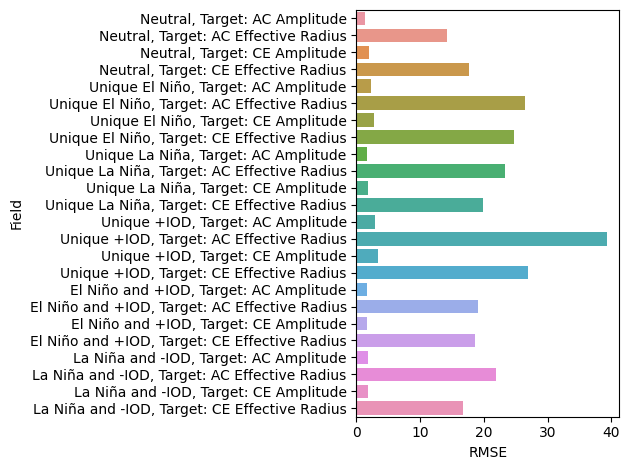

In [8]:


result = pd.DataFrame({"Field":field,"RMSE":rmse})
result.to_csv("/kaggle/working/RandomForestResult.csv",index = False)

plt.style.use("default")
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

sns.barplot(result, x="RMSE", y = "Field", orient = "h")

#plt.title("Root Mean Squared Error from the Random Forest Classification")
fig.subplots_adjust(left=0.7)
plt.savefig("/kaggle/working/RandomForestResult.png")